# How to Implement Bayesian Optimization from Scratch in Python
- https://machinelearningmastery.com/what-is-bayesian-optimization/

In [1]:
pwd

'd:\\ASSIST\\scripts'

In [2]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
# example of a gaussian process surrogate function
from math import sin, pi
from numpy import arange, asarray
from numpy.random import normal, random
import pandas as pd
import numpy as np
from matplotlib import pyplot
from warnings import catch_warnings, simplefilter
from sklearn.gaussian_process import GaussianProcessRegressor

# Test Problem

In [4]:
# objective function
def objective(x, noise=0.1):
    noise = normal(loc=0, scale=noise)
    return (x**2 * sin(5 * pi * x)**6.0) + noise

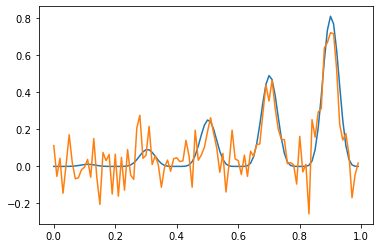

In [5]:
# grid-based sample of the domain [0,1]
X = arange(0, 1, 0.01)

# sample the domain without noise
y = [objective(x, 0) for x in X]

# sample the domain with noise
ynoise = [objective(x) for x in X]

pyplot.plot(X, y)
pyplot.plot(X, ynoise)

In [6]:
# find best result
ix = np.argmax(y)
print('Optima: x=%.3f, y=%.3f' % (X[ix], y[ix]))

Optima: x=0.900, y=0.810


# Surrogate Function
- Now that we have a test problem, let’s review how to train a surrogate function.

In [7]:
# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        # ignore generated warnings
        simplefilter("ignore")
        return model.predict(X, return_std=True)

In [8]:
# plot real observations vs surrogate function
def plot(X, y, model):
    # scatter plot of inputs and real objective function
    pyplot.scatter(X, y)
    # line plot of surrogate function across domain
    Xsamples = asarray(arange(0, 1, 0.001))
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    ysamples, _ = surrogate(model, Xsamples)
    pyplot.plot(Xsamples, ysamples)
    # show the plot
    pyplot.show()

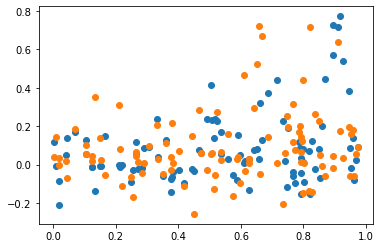

In [9]:
# sample the domain sparsely with noise
X = random(100)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
pyplot.scatter(X, y)
pyplot.scatter(X, ynoise)

In [10]:
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)

GaussianProcessRegressor()

the surrogate function


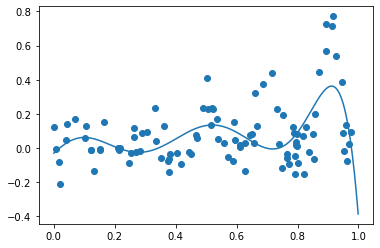

In [11]:
# plot the surrogate function
print('the surrogate function')
plot(X, y, model)

# Acquisition Function

# Complete Bayesian Optimization Algorithm

In [12]:
# example of bayesian optimization for a 1d function from scratch
from math import sin
from math import pi
from numpy import arange
from numpy import vstack
from numpy import argmax
from numpy import asarray
from numpy.random import normal
from numpy.random import random
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import pyplot

In [13]:
# objective function
def objective(x, noise=0.1):
    noise = normal(loc=0, scale=noise)
    return (x**2 * sin(5 * pi * x)**6.0) + noise

# 데이터(금채광비용 =0)가 많으면 global optimization(금이 제일 많이 묻힌 곳)이 어디 인지 알 수가 있음

In [117]:
# Sample size
samples = 100
# sample the domain sparsely with noise
X = random(samples)
y = asarray([objective(x) for x in X])

In [118]:
# objective function
def objective(x, noise=0.1):
    noise = normal(loc=0, scale=noise)
    return (x**2 * sin(5 * pi * x)**6.0) + noise

In [119]:
# plot real observations vs surrogate function
def plot(X, y, model):
    # scatter plot of inputs and real objective function
    pyplot.scatter(X, y)
    # line plot of surrogate function across domain
    Xsamples = asarray(arange(0, 1, 0.001))
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    ysamples, _ = surrogate(model, Xsamples)
    pyplot.plot(Xsamples, ysamples); pyplot.show()

In [120]:
# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        # ignore generated warnings
        simplefilter("ignore")
        return model.predict(X, return_std=True)

GaussianProcessRegressor()

the surrogate function


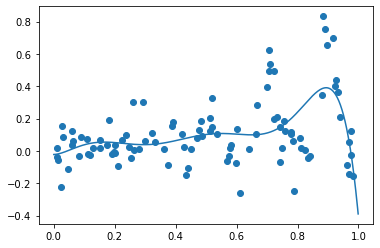

In [121]:
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand, the surrogate function
print('the surrogate function')
plot(X, y, model)

# 현실은 채광비용이 비싸서 최적의 채광 데이터를 골라 채굴하여야 함

In [122]:
# Sample size (채광 회수)
samples = 5
# sample the domain sparsely with noise
X = random(samples)
y = asarray([objective(x) for x in X])

In [75]:
# plot real observations vs surrogate function
def plot(X, y, model):
    # scatter plot of inputs and real objective function
    pyplot.scatter(X, y)
    # line plot of surrogate function across domain
    Xsamples = asarray(arange(0, 1, 0.001))
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    ysamples, _ = surrogate(model, Xsamples)
    pyplot.plot(Xsamples, ysamples)
    pyplot.ylim(-1, 1)
    # show the plot
    pyplot.show()

In [76]:
# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        # ignore generated warnings
        simplefilter("ignore")
        return model.predict(X, return_std=True)

GaussianProcessRegressor()

the surrogate function


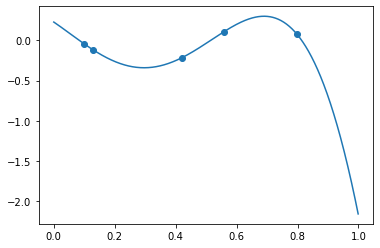

In [127]:
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(X, y)
# plot before hand, the surrogate function
print('the surrogate function')
plot(X, y, model)

# 5번으로는 판단이 안된다. 대략 10번을 파보면 global optimization(max y)을 알 수있을 것 같으데, 정말 그럴까?

In [163]:
norm.cdf(0)

0.5

In [160]:
yhat, _ = surrogate(model, X)
yhat
best = max(yhat)
print(f'best : {best}')

Xsamples = random(samples)
Xsamples = Xsamples.reshape(len(Xsamples), 1)
mu, std = surrogate(model, Xsamples)
mu = mu[:, 0]
probs = norm.cdf((mu - best) / (std+1E-9)) # calculation
probs

array([[-0.04244383],
       [-0.21709671],
       [ 0.10383546],
       [-0.11827329],
       [ 0.08144154]])

best : [0.10383546]


array([0., 1., 1., 0., 1.])

In [56]:
# probability of improvement acquisition function
def acquisition(X, Xsamples, model):
    #~~~~~~~~~~~~~
    yhat, _ = surrogate(model, X) # calculate the best surrogate score found so far
    #~~~~~~~~~~~~~
    best = max(yhat)
    mu, std = surrogate(model, Xsamples) # calculate mean and stdev via surrogate function
    mu = mu[:, 0]
    probs = norm.cdf((mu - best) / (std+1E-9)) # calculate the probability of improvement
    print(f'prob {probs}')
    return probs

# optimize the acquisition function
def opt_acquisition(X, y, model):
    # random search, generate random samples    Xsamples = random(samples)
    Xsamples = random(samples)
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    # ~~~~~~~~~~~~~~
    scores = acquisition(X, Xsamples, model)     # calculate the acquisition function for each sample
    # ~~~~~~~~~~~~~~
    print(f'Xsamples :  {Xsamples[:,0]}   Aquisition scores : {scores}')       
    ix = argmax(scores) # locate the index of the largest scores 
    print(f'{ix}번째 sample {Xsamples[ix, 0]} has the largest aquisition scores')
    return Xsamples[ix, 0]

X :  [0.28831155 0.00849638 0.94965161 0.40817808 0.12193443]
y(object): [0.21551043 0.07262121 0.15018278 0.03632569 0.10169202]


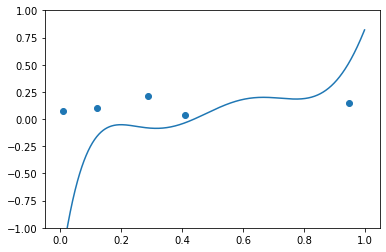

In [95]:
# sample the domain sparsely with noise
X = random(samples)
y = asarray([objective(x) for x in X])
# reshape into rows and cols
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
print(f'X :  {X[:,0]}')
print(f'y(object): {y[:, 0]}')

plot(X, y, model)

random search, generate random samples
prob [0. 0. 0. 0. 0.]
Xsamples :  [0.60805429 0.38289764 0.78189838 0.80712708 0.96812198]   Aquisition scores : [0. 0. 0. 0. 0.]
0번째 sample 0.6080542925593836 has the largest aquisition scores
>>>  x=0.608, f()=-0.387956, actual=0.119


GaussianProcessRegressor()

(10, 1) (10, 1)


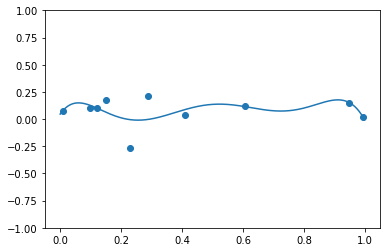

Best Result: x=0.288, y=0.216
****************************************************************************************************


In [100]:
# perform the optimization process
for i in range(1):
    # random search, generate random samples
    print('random search, generate random samples')
    
    x = opt_acquisition(X, y, model) # select the next point to sample
    
    # sample the point 
    actual = objective(x)
    # summarize the finding
    est, _ = surrogate(model, [[x]])
    print('>>>  x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
    
    # add the data to the dataset
    X = vstack((X, [[x]]))
    y = vstack((y, [[actual]]))
    
    model.fit(X, y) #  update the model
    print(X.shape, y.shape)  
    plot(X, y, model) # plot all samples and the final surrogate function   
    ix = argmax(y)  # best result
    print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))
    print('*'*100)

random search, generate random samples
prob [0. 0. 0. 0. 0.]
Xsamples :  [0.33080414 0.87178184 0.2579722  0.57994628 0.97975984]   Aquisition scores : [0. 0. 0. 0. 0.]
0번째 sample 0.33080413865301284 has the largest aquisition scores
>>>  x=0.331, f()=-0.038454, actual=0.051


GaussianProcessRegressor()

(121, 1) (121, 1)


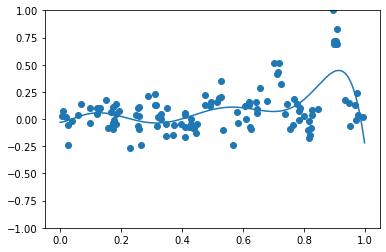

Best Result: x=0.896, y=0.999
****************************************************************************************************
random search, generate random samples
prob [0. 0. 0. 0. 0.]
Xsamples :  [0.87789099 0.27367771 0.51853841 0.6087722  0.15548406]   Aquisition scores : [0. 0. 0. 0. 0.]
0번째 sample 0.8778909858351606 has the largest aquisition scores
>>>  x=0.878, f()=0.395862, actual=0.341


GaussianProcessRegressor()

(122, 1) (122, 1)


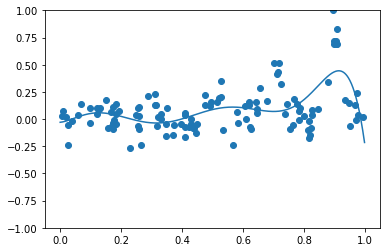

Best Result: x=0.896, y=0.999
****************************************************************************************************
random search, generate random samples
prob [0. 0. 0. 0. 0.]
Xsamples :  [0.09242091 0.94028073 0.00566871 0.78470843 0.89925564]   Aquisition scores : [0. 0. 0. 0. 0.]
0번째 sample 0.09242090745007003 has the largest aquisition scores
>>>  x=0.092, f()=0.047629, actual=-0.121


GaussianProcessRegressor()

(123, 1) (123, 1)


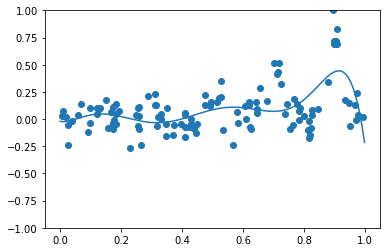

Best Result: x=0.896, y=0.999
****************************************************************************************************
random search, generate random samples
prob [0. 0. 0. 0. 0.]
Xsamples :  [0.26261872 0.93232073 0.68585134 0.99871208 0.45717305]   Aquisition scores : [0. 0. 0. 0. 0.]
0번째 sample 0.2626187196088635 has the largest aquisition scores
>>>  x=0.263, f()=-0.017383, actual=0.081


GaussianProcessRegressor()

(124, 1) (124, 1)


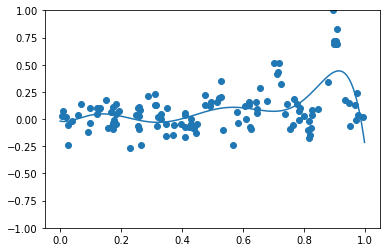

Best Result: x=0.896, y=0.999
****************************************************************************************************
random search, generate random samples
prob [0. 0. 0. 0. 0.]
Xsamples :  [0.21158874 0.1111003  0.98515662 0.2295732  0.99969138]   Aquisition scores : [0. 0. 0. 0. 0.]
0번째 sample 0.21158873586098292 has the largest aquisition scores
>>>  x=0.212, f()=0.019311, actual=0.013


GaussianProcessRegressor()

(125, 1) (125, 1)


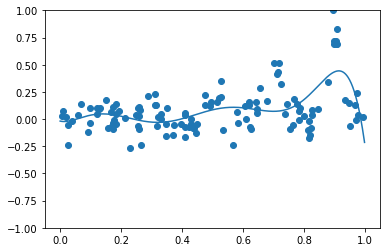

Best Result: x=0.896, y=0.999
****************************************************************************************************


In [105]:
# perform the optimization process
for i in range(samples):
    # random search, generate random samples
    print('random search, generate random samples')
    
    x = opt_acquisition(X, y, model) # select the next point to sample
    
    # sample the point 
    actual = objective(x)
    # summarize the finding
    est, _ = surrogate(model, [[x]])
    print('>>>  x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
    
    # add the data to the dataset
    X = vstack((X, [[x]]))
    y = vstack((y, [[actual]]))
    
    model.fit(X, y) #  update the model
    print(X.shape, y.shape)  
    plot(X, y, model) # plot all samples and the final surrogate function   
    ix = argmax(y)  # best result
    print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))
    print('*'*100)

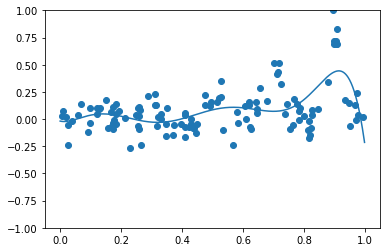

Best Result: x=0.896, y=0.999


In [106]:
# plot all samples and the final surrogate function
plot(X, y, model)
# best result
ix = argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

# End